# COURSERA IBM MACHINE LEARNING CERTIFICATION
## Léa Zurfluh - Feb 2021
### End of module project: Exploratory Data Analysis

Aim of project is to explore a chosen data set in order to provide analytical insights to senior audience.

Data set chosen: Flavors of cacao.

## 1. Brief description of the data set and a summary of its attributes

Ratings of chocolate bars from a variety of manufacturers, with different bean origins, cocoa percent, type of beans. Those ratings have been done by experts, and are focussing on plain, dark chocolate (the best one, obviously) between 2006 and 2017.

1795 rows.

|   |Column attribute |Type  |Comment |
| - | ------- | ------------ | ---- |
| 0	| Company (maker)  | object | Maker of the chocolate bar  |
| 1	| Bar name  | object  | Specific origin country/area of bean  |
| 2	| Reference  | int64  | Linked to moment the review was entered  |
| 3	| Review date  | int64  | Year of review  |
| 4	| Cocoa percent  | object  | Formatted as a string  |
| 5	| Company location  | object  | Country of maker  |
| 6	| Rating  | float64  | Out of 5. Expert rating of bar  |
| 7	| Bean type  | object  | The variety (breed) of bean used, if provided  |
| 8	| Broad Bean origin  | object  | Origin region of the bean  |



## 2. Data exploration
### I. Data cleaning
##### I.a. General data cleaning
* Column names contain line breaks -> Remove them for better navigation
* Certain cells of dataframe are null -> Make pandas consider them as empty strings to match the column type (they are only in 'object' columns)
* Column 'Cocoa Percent' contents are strings -> Transform them to float

##### I.b. Category cleaning
Columns 'Bean Type' and 'Bean Origin (Country)' contain many different values. 
* Column 'Bean Type': Keep only broad type, and map the categories that have fewer than 5 values as 'Other'
* Column Bean Origin (Country)': Clean categories to map multiple countries to 'Multiple'

### II. Feature engineering
##### II.a. Fixing skewness
* Visualise numerical variable as histograms in order to spot skewness
* Remove potential skewness more systematically

##### II.b. Adding polynomial features
* Visualising relationship of features with target as pairplot. 
* If a feature seems to have a polynomial of degree > 1 relationship with target, add a polynomial feature.

##### II.c. One-hot encoding
Because the aim of this assignment is Data Analysis more than Machine Learning, the one-hot encoding has been left aside.

### III. Hypothesis testing
##### III.a. Formulating 3 hypotheses
* Finding hypothesis to test: checking means of ratings per category

##### III.b. Testing 1 hypothesis
* Correlation of Rating and Cocoa Percent

### IV. Conclusion

## <font color = 'blue'> 1. Get the data </font>

In [1]:
### IMPORTS ###
import pandas as pd
import numpy as np

### VARIABLES ###
FILE = 'flavors_of_cacao.csv'

In [2]:
# Store data set in dataframe
df = pd.read_csv('data/' + FILE)
df.head()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


## <font color = 'blue'> 2. Initial Data Exploration </font>
### <font color = 'blue'>I. Data Cleaning </font>
#### <font color = 'blue'> I.a. General Data Cleaning </font>

In [3]:
# replace line breaks in column names to have a cleaner header
new_col = []
for col in df.columns.values:
    new_col.append(col.replace('\n', ' '))

new_col[0] = 'Company'
df.columns = new_col

In [4]:
# Cleaner info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
Company                             1795 non-null object
Specific Bean Origin or Bar Name    1795 non-null object
REF                                 1795 non-null int64
Review Date                         1795 non-null int64
Cocoa Percent                       1795 non-null object
Company Location                    1795 non-null object
Rating                              1795 non-null float64
Bean Type                           1794 non-null object
Broad Bean Origin                   1794 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [5]:
# Replace all null values by white spaces
#df = df.replace(r'^\s*$', np.NaN, regex=True)
df = df.replace(np.NaN, r'^\s*$', regex=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
Company                             1795 non-null object
Specific Bean Origin or Bar Name    1795 non-null object
REF                                 1795 non-null int64
Review Date                         1795 non-null int64
Cocoa Percent                       1795 non-null object
Company Location                    1795 non-null object
Rating                              1795 non-null float64
Bean Type                           1795 non-null object
Broad Bean Origin                   1795 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [6]:
# Cocoa percent is an 'object' type and not a number.

# 1. Define function to convert to float
def per_to_float(per):
    '''funcion that takes a string of format 56% and transform it to float 0.56
    argument: per (string)
    returns: float'''
    return float(per.strip('%'))/100

# 2. Apply function to Cocoa Percent column
df['Cocoa Percent'] = df['Cocoa Percent'].apply(per_to_float)

In [7]:
#Check

df['Cocoa Percent'].head()

0    0.63
1    0.70
2    0.70
3    0.70
4    0.70
Name: Cocoa Percent, dtype: float64

In [8]:
df[['Rating', 'Cocoa Percent']].describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,1795.0,3.185933,0.478062,1.00,2.875,3.25,3.50,5.0
Cocoa Percent,1795.0,0.716983,0.063231,0.42,0.700,0.70,0.75,1.0


#### <font color = 'blue'>I.b. Categories Cleaning </font>

In [9]:
### Categorical variables: how many categories?

for col in df.select_dtypes('object').columns:
    print('Nb of unique values in column {} is: {}'.format(col, len(df[col].unique())))


Nb of unique values in column Company is: 416
Nb of unique values in column Specific Bean Origin or Bar Name is: 1039
Nb of unique values in column Company Location is: 60
Nb of unique values in column Bean Type is: 42
Nb of unique values in column Broad Bean Origin is: 101


In [10]:
df['Bean Type'].value_counts()

                            887
Trinitario                  419
Criollo                     153
Forastero                    87
Forastero (Nacional)         52
Blend                        41
Criollo, Trinitario          39
Forastero (Arriba)           37
Criollo (Porcelana)          10
Trinitario, Criollo           9
Forastero (Parazinho)         8
Forastero (Arriba) ASS        6
Nacional (Arriba)             3
Matina                        3
Beniano                       3
EET                           3
Criollo, Forastero            2
Criollo (Ocumare 61)          2
Forastero (Catongo)           2
Trinitario, Forastero         2
Amazon, ICS                   2
Nacional                      2
Criollo (Amarru)              2
Trinitario (85% Criollo)      2
Amazon mix                    2
Criollo, +                    1
Criollo (Ocumare 77)          1
CCN51                         1
Trinitario, TCGA              1
Forastero (Amelonado)         1
Criollo (Ocumare)             1
^\s*$   

In [11]:
# Bean type: several categories are generic categories which are specified in brackets. 
# Let's get rid of everything after the first white space.
df['Bean Type'] = df['Bean Type'].str.split(' ').str[0]

# Same with the first comma.
df['Bean Type'] = df['Bean Type'].str.split(',').str[0]

# Keep only categories that are not blank and have more than 5 values
nb_bt = df['Bean Type'].value_counts()
other_bt = list(nb_bt[nb_bt <= 5].index)
df['Bean Type_clean'] = df['Bean Type'].replace(other_bt, 'Other')
df['Bean Type_clean'] = df['Bean Type_clean'].replace(r'^\s*$', 'Null', regex=True)

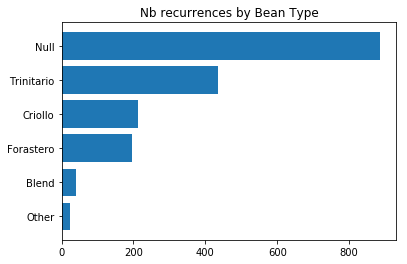

In [12]:
# Visualising number of each Bean Type (cleaned)
%matplotlib inline
import matplotlib.pyplot as plt

df2 = pd.DataFrame(df.groupby('Bean Type_clean')['Bean Type_clean'].count()).rename({'Bean Type_clean':'nb'}, axis='columns').sort_values(by='nb')
plt.barh(df2.index, df2['nb'])
plt.title('Nb recurrences by Bean Type');

In [13]:
#### Broad Bean Origin: can be a single country or multiple. If coma is detected -> mapped to 'Multiple'

# 1. Build function to transform a string if it contains a coma
def coma_multiple(string):
    '''Checks if string contains ','. If yes, change it to 'Multiple'
    argument: string (str)
    returns: string_out (str)'''
    if ',' in string:
        string_out = 'Multiple'
    else: string_out = string
    return string_out

# 2. Apply function to 'Broad Bean Origin' column
df['Broad Bean Origin_clean'] = df.apply(lambda x: coma_multiple(x['Broad Bean Origin']), axis=1)

# Keep only categories that are not blank and have more than 100 values
nb_bt = df['Broad Bean Origin_clean'].value_counts()
other_bt = list(nb_bt[nb_bt <= 100].index)
df['Broad Bean Origin_clean'] = df['Broad Bean Origin_clean'].replace(other_bt, 'Other')
df['Broad Bean Origin_clean'] = df['Broad Bean Origin_clean'].replace(r'^\s*$', 'Null', regex=True)

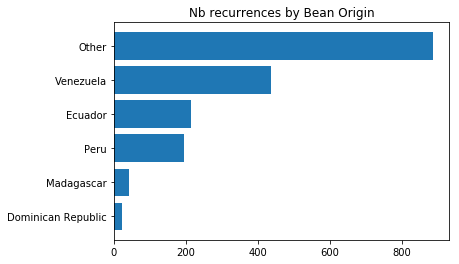

In [14]:
# Visualising number of each Bean Origin (cleaned)

df3 = pd.DataFrame(df.groupby('Broad Bean Origin_clean')['Broad Bean Origin_clean'].count()).rename({'Broad Bean Origin_clean':'nb'}, axis='columns').sort_values(by='nb')
plt.barh(df3.index, df2['nb'])
plt.title('Nb recurrences by Bean Origin');

### <font color = 'blue'> II. Feature engineering </font>

#### <font color = 'blue'>II.a. Fixing skewness</font>

In [15]:
# IMPORTS
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')

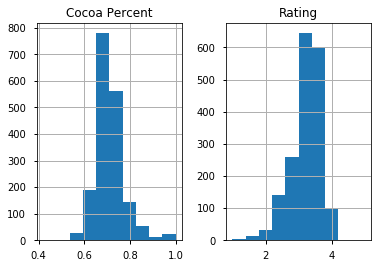

In [16]:
# Visualising numerical variables first
df[['Cocoa Percent', 'Rating']].hist();

In [17]:
# Checking skewness. If abs(skewness) > 0.75 let's take the log of the variable. 
# From the charts above, 'Cocoa Percent' seems skewed.

num_cols = df.select_dtypes('number').columns
skew_lim = 0.75
skew_vals = df[num_cols].skew()
skew_vals[abs(skew_vals)>=skew_lim].sort_values(ascending=False) # As suspected, only Cocoa Percent shows high skewness

Cocoa Percent    1.058604
dtype: float64

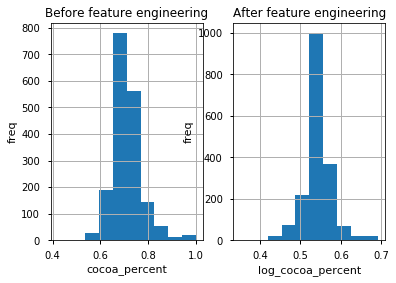

In [18]:
# First, let's visualise the difference feature engineering would make on the histogram.

fig, [ax1, ax2] = plt.subplots(1, 2)
df['Cocoa Percent'].hist(ax=ax1)
df['Cocoa Percent'].apply(np.log1p).hist(ax=ax2)

ax1.set(title='Before feature engineering', xlabel='cocoa_percent', ylabel='freq')
ax2.set(title='After feature engineering', xlabel='log_cocoa_percent', ylabel='freq');

In [19]:
# Fix skewness in dataframe
df['Cocoa Percent_log'] = df['Cocoa Percent'].apply(np.log1p)

In [20]:
# Check skewness of new column to verify it is below our threshold
df['Cocoa Percent_log'].skew()

0.7443751708353337

#### <font color = 'blue'>II.b. Adding polynomial features </font>

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 12 columns):
Company                             1795 non-null object
Specific Bean Origin or Bar Name    1795 non-null object
REF                                 1795 non-null int64
Review Date                         1795 non-null int64
Cocoa Percent                       1795 non-null float64
Company Location                    1795 non-null object
Rating                              1795 non-null float64
Bean Type                           1795 non-null object
Broad Bean Origin                   1795 non-null object
Bean Type_clean                     1795 non-null object
Broad Bean Origin_clean             1795 non-null object
Cocoa Percent_log                   1795 non-null float64
dtypes: float64(3), int64(2), object(7)
memory usage: 168.4+ KB


In [22]:
# Let's reduce the dataframe to keep only useful data (the Ref column can be overlooked)

df_pairplot = df[['Broad Bean Origin_clean', 'Bean Type_clean', 'Review Date', 'Cocoa Percent_log', 'Rating']]

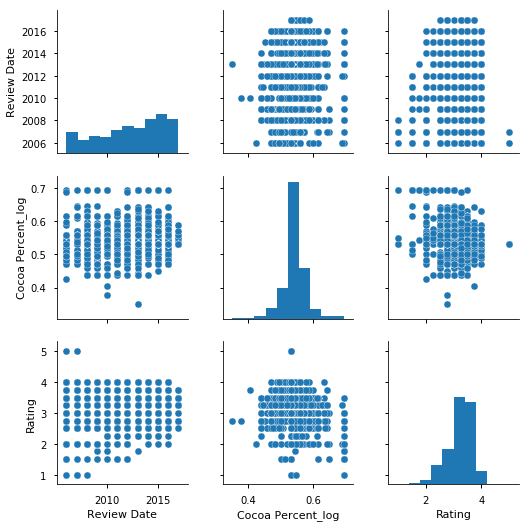

In [23]:
sns.pairplot(df_pairplot);

/Users/leazurfluh/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/Users/leazurfluh/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/Users/leazurfluh/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-

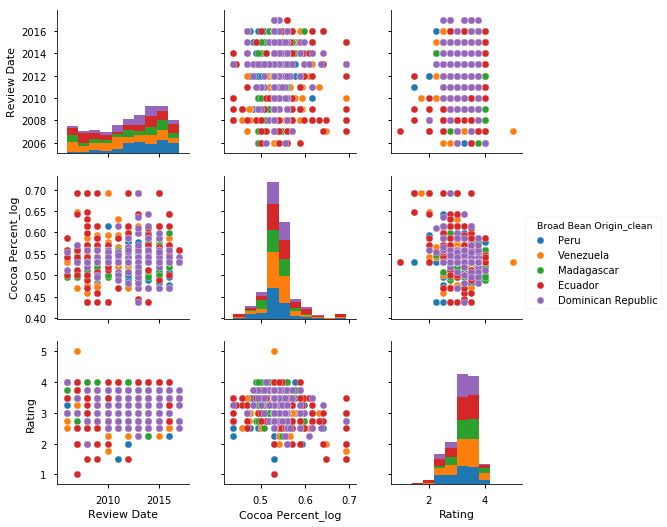

In [24]:
sns.pairplot(df_pairplot[df_pairplot['Broad Bean Origin_clean'] != 'Other'], hue = 'Broad Bean Origin_clean') 

In [25]:
df['Broad Bean Origin_clean'].value_counts()

Other                 937
Venezuela             214
Ecuador               193
Peru                  165
Madagascar            145
Dominican Republic    141
Name: Broad Bean Origin_clean, dtype: int64

Based on pairplots above, there are no obvious polynomial features to be added to our data set.

### <font color = 'blue'> III. Hypothesis testing </font>

#### <font color = 'blue'>III.a. Formulating 3 hypotheses</font>

In [26]:
# Compute main statistics for both numerical variables

df[['Cocoa Percent_log', 'Rating']].describe().T

,count,mean,std,min,25%,50%,75%,max
Cocoa Percent_log,1795.0,0.539905,0.036268,0.350657,0.530628,0.530628,0.559616,0.693147
Rating,1795.0,3.185933,0.478062,1.000000,2.875000,3.250000,3.500000,5.000000


In [27]:
# Rescaling metrics and creating sub dataframes to allow for better comparison.

df['Rating_percent'] = df['Rating'] /5 # define rating /1 instead of /5
df_origin = df[df['Broad Bean Origin_clean'] != 'Other']
df_type = df[df['Bean Type_clean'] != 'Null']

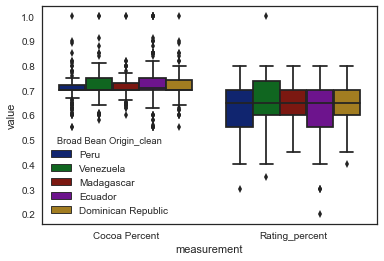

In [28]:
# Compute box plots for different Bean Origins for metrics to find if there are any notable differences

# 1. Table of the mean of each measurement (Cacao Percent and Rating) per bean Origin
plot_origin = (df_origin[['Cocoa Percent', 'Rating_percent', 'Broad Bean Origin_clean']]
             .set_index('Broad Bean Origin_clean')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'value', 'level_1':'measurement'})
            )

# 2. Boxplot chart to visualise better the mean/distribution of both measurements per Bean Origin
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize=(6,4))
sns.boxplot(x='measurement', y='value', 
            hue='Broad Bean Origin_clean', data=plot_origin);

# No visual difference

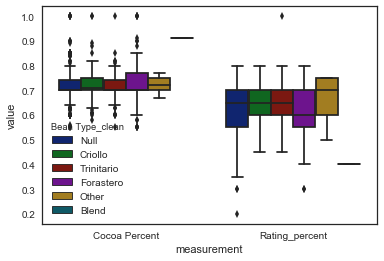

In [29]:
# Compute box plots for different Bean Type for metrics to find if there are any notable differences

# 1. Table of the mean of each measurement (Cacao Percent and Rating) per Bean Type
plot_type = (df_origin[['Cocoa Percent', 'Rating_percent', 'Bean Type_clean']]
             .set_index('Bean Type_clean')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'value', 'level_1':'measurement'})
            )

# 2. Boxplot chart to visualise better the mean/distribution of both measurements per Bean Type
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize=(6,4))
sns.boxplot(x='measurement', y='value', 
            hue='Bean Type_clean', data=plot_type);

# It seems like the rating of Forastero is lower than the rest, and conversely, the rating of 'Other' is higher

Bean Type seems, conversely to Bean Origin, to lead to stronger results as there is no major difference between the mean and distribution of ratings for different bean origins. Forastero seems to have lower ratings than the rest while Other seems to have higher ratings.
<br>
However the sample size of Other needs to be taken into account: with only 23 instances, this alleged higher rating might not be significant given the total sample size we are analysing (1795 ratings).

In [30]:
# Table to show mean and median per Bean Origin for both measurements (Cacao percent and Rating)

df_origin.groupby('Broad Bean Origin_clean').agg(['mean', 'median'])[['Cocoa Percent_log', 'Rating_percent']]

Cocoa Percent_log           Rating_percent       
                                     mean    median           mean median
Broad Bean Origin_clean                                                  
Dominican Republic               0.539997  0.530628       0.641844   0.65
Ecuador                          0.548706  0.536493       0.626943   0.65
Madagascar                       0.537167  0.530628       0.653103   0.65
Peru                             0.534201  0.530628       0.627576   0.65
Venezuela                        0.542277  0.530628       0.649065   0.65

In [31]:
# Table to show mean and median per Bean Type for both measurements (Cocoa percent and Rating)

df_type.groupby('Bean Type_clean').agg(['mean', 'median'])[['Cocoa Percent_log', 'Rating_percent']]

Cocoa Percent_log           Rating_percent       
                             mean    median           mean median
Bean Type_clean                                                  
Blend                    0.538088  0.530628       0.670732   0.70
Criollo                  0.541677  0.530628       0.653991   0.65
Forastero                0.542653  0.530628       0.622564   0.60
Other                    0.539045  0.530628       0.693478   0.70
Trinitario               0.539799  0.530628       0.649083   0.65

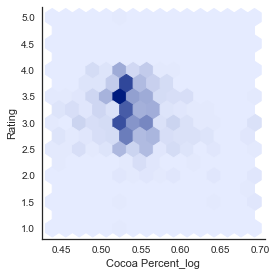

In [32]:
# Seaborn hexbin plot for ratings vs. cocoa percent

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)
    
g = sns.FacetGrid(df_origin, size=4)
g.map(hexbin, 'Cocoa Percent_log', "Rating")


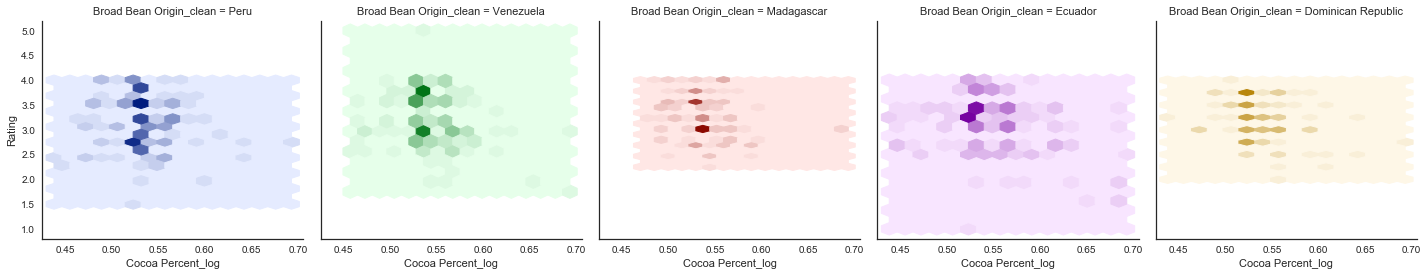

In [33]:
# Now separated by Bean Origin to verify if a specific origin can lead to higher correlation

g = sns.FacetGrid(df_origin, hue='Broad Bean Origin_clean', col='Broad Bean Origin_clean', size=4)
g.map(hexbin, 'Cocoa Percent_log', "Rating")

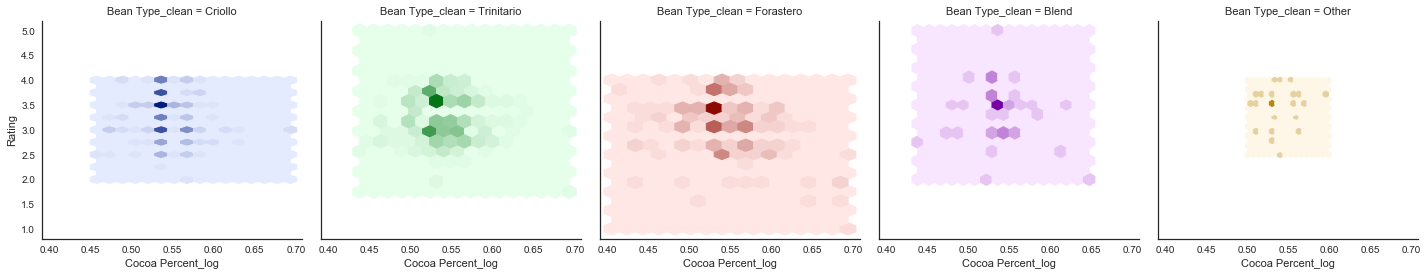

In [34]:
# Same for Bean Type
g = sns.FacetGrid(df_type, hue='Bean Type_clean', col='Bean Type_clean', size=4)
g.map(hexbin, 'Cocoa Percent_log', "Rating")

<font color = 'blue'> 1. First hypothesis that comes to mind is to check the correlation of Cocoa Percentage with Rating. Intuitively, a higher percentage could lead to a higher expert rating - however we have seen above that the opposite seems to be true. </font>
<br><b> H0: Correlation of Cocoa Percentage with Rating is = 0 </b>
<br> Ha: Correlation of Cocoa Percentage with Rating is ≠ 0
<br>
<br>
<font color = 'blue'> 2. Then: the average rating of Bean Type = Forastero is lower than the mean of population. </font>
<br><b> H0: Avg rating (Forastero) = avg rating  </b>
<br> Ha: Avg rating (Forastero) ≠ avg rating 
<br>
<br>
<font color = 'blue'> 3. Finally: the average rating of Bean Type = Other is higher than the mean of population </font>
<br><b> H0: Avg rating (Other) = avg rating  </b>
<br> Ha: Avg rating (Other) ≠ avg rating 

#### <font color = 'blue'>III.b. Testing hypotheses</font>

<b> I. Correlation hypothesis </b>
<br>
<br>
Chosen p-value = 0.05    

In [35]:
# Computing correlation (Pearson and Spearman) between rating and cocoa percentage

from scipy.stats import pearsonr
from scipy.stats import spearmanr

def significance(pvalue):
    '''input: p-value (float)
    output: string '''
    cr = ''
    if pvalue < 0.05:
        return 'significantly correlated'
    else: return 'not significantly correlated'
    
corrp, pp = pearsonr(df['Cocoa Percent'], df['Rating'])
# Spearman correlation might be a better tool since both variables are not normally distributed
corrs, ps = spearmanr(df['Cocoa Percent'], df['Rating']) 


print('Pearsons correlation: {:.1%}. The 2 variables are probably {}.'.format(corrp, significance(pp)))
print('Spearmans correlation: {:.1%}. The 2 variables are probably {}.'.format(corrs, significance(ps)))

# Turns out both correlation coefficients are negative, suggesting an inverse relationship between cocoa % and rating!

Pearsons correlation: -16.5%. The 2 variables are probably significantly correlated.
Spearmans correlation: -12.4%. The 2 variables are probably significantly correlated.


Surprisingly, rating and cocoa percent seem to be negatively correlated (both Pearson and Spearman correlations seem to be significantly ≠ 0). A higher cocoa % would be more likely to have a lower rating. 
* Obviously some other confounding variables can play a role, such as a certain brand that consistently makes chocolate that experts appreciate more which uses cocoa with lower cocoa percent than average.
* Finally, correlation implies a linear relationship between variables tested, as well as other assumptions such as normal distributions centred around the line, or residuals being also normally distributed. We need more informations about this to conclude anything about correlation.







In [36]:
# Compute correlation and p-value for cocoa percent vs. rating for each Bean Origin

correl_origin = []

for origin in df['Broad Bean Origin_clean'].unique():
    df_temp = df[df['Broad Bean Origin_clean']==origin]
    df_temp2 = [origin
                ,pearsonr(df_temp['Cocoa Percent_log'], df_temp['Rating'])[0]
                ,pearsonr(df_temp['Cocoa Percent_log'], df_temp['Rating'])[1]]
    correl_origin.append(df_temp2)
    
correl_origin = pd.DataFrame(correl_origin, columns=['Bean Origin', 'Correlation', 'P-value'])

# Determine significance of correlation
correl_origin['Significance'] = correl_origin.apply(lambda x: significance(x['P-value']), axis=1)

In [37]:
correl_origin

,Bean Origin,Correlation,P-value,Significance
0,Other,-0.095161,0.003550,significantly correlated
1,Peru,-0.058884,0.452483,not significantly correlated
2,Venezuela,-0.222643,0.001041,significantly correlated
3,Madagascar,-0.213994,0.009751,significantly correlated
4,Ecuador,-0.308943,0.000012,significantly correlated
5,Dominican Republic,-0.260379,0.001819,significantly correlated


In [38]:
# Compute correlation and p-value for cocoa percent vs. rating for each Bean Type

correl_type = []

for type in df['Bean Type_clean'].unique():
    df_temp = df[df['Bean Type_clean']==type]
    df_temp2 = [type
                            ,pearsonr(df_temp['Cocoa Percent_log'], df_temp['Rating'])[0]
                            ,pearsonr(df_temp['Cocoa Percent_log'], df_temp['Rating'])[1]]
    correl_type.append(df_temp2)
    
correl_type = pd.DataFrame(correl_type, columns=['Bean Type', 'Correlation', 'P-value'])

# Determine significance of correlation
correl_type['Significance'] = correl_type.apply(lambda x: significance(x['P-value']), axis=1)

In [39]:
correl_type

,Bean Type,Correlation,P-value,Significance
0,Null,-0.135320,5.274963e-05,significantly correlated
1,Criollo,-0.103256,1.330653e-01,not significantly correlated
2,Trinitario,-0.084813,7.688585e-02,not significantly correlated
3,Forastero,-0.354356,3.727325e-07,significantly correlated
4,Blend,-0.156366,3.289213e-01,not significantly correlated
5,Other,0.111050,6.139515e-01,not significantly correlated


Bean Type seems to lead to stronger results than Bean Origin. Forastero type's cocoa percent is 37% negatively correlated with their ratings, meaning that for this Bean Type, higher cocoa percent is likely to lead to lower ratings.
* Not all correlations tested are significantly ≠ 0. This can be due to the sample size of certain Origins / Types, for example Blend type has 41 ratings and Other only 23.
* Here again, correlation implies a linear relationship between variables tested, as well as other assumptions such as normal distributions centred around the line, or residuals being also normally distributed. We need more informations about this to conclude anything about correlation.

<b>II. Forastero mean hypothesis

In [40]:
# Let's calculate the t-statistic and p-value from the scipy.stats package. 
# The mean rating from forastero beans is significantly ≠ from the population if p-value < 0.05.

import scipy.stats as stats

forasteromean = df[df['Bean Type_clean']=='Forastero']['Rating']
popmean = df['Rating'].mean()
stats.ttest_1samp(a=forasteromean,popmean=popmean)

Ttest_1sampResult(statistic=-1.8770737512520141, pvalue=0.062009063535278006)

The p-value being 0.06 > 0.05, we cannot conclude that the difference in rating for Forastero beans is different from the rest. 
<br> <b> Insights: inconclusive results.

### <font color = 'blue'> IV. Conclusion </font>
<br>
In this paper, we tried to investigate if certain bean types, bean origins or cocoa % would lead to different chocolate ratings by experts. Findings are summarised below:
1. In general, chocolate ratings seem to be slightly negatively correlated with cocoa % (correlation of c. -12%).
2. This trend is more or less strong depending on the bean type: for instance Forastero beans exhibit a correlation of -37%, which might be an indication of the quality of the bean. This is still to be refined.
3. Different bean origins don't seem to lead to different average ratings when we see more differences in bean types. However when testing for significance, we cannot conclude that certain bean types systematically exhibit lower / higher ratings.